In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataframes
df_fact = pd.read_csv("fact_table.csv", encoding = "latin-1")
df_customer = pd.read_csv("customer_dim.csv", encoding = "latin-1")
df_item = pd.read_csv("item_dim.csv", encoding = "latin-1")
df_store = pd.read_csv("store_dim.csv", encoding = "latin-1")
df_time = pd.read_csv("time_dim.csv", encoding = "latin-1")
df_trans = pd.read_csv("trans_dim.csv", encoding = "latin-1")

In [4]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [5]:
df_fact.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [6]:
# Renaming misspelled columns
df_fact.rename(columns = {"coustomer_key":"customer_key"}, inplace=True)

In [7]:
df_fact.duplicated().sum()

0

In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB


In [9]:
df_customer.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [10]:
# Renaming columns to be more understandable
df_customer.rename(columns = {"nid":"national_id", "coustomer_key":"customer_key", "name":"customer_name"}, inplace=True)
df_customer["customer_name"] = df_customer["customer_name"].str.title() #making customer names capitalized
df_customer.head()

,customer_key,customer_name,contact_no,national_id
0,C000001,Sumit,8801920345851,7505075708899
1,C000002,Tammanne,8801817069329,1977731324842
2,C000003,Kailash Kumar,8801663795774,3769494056318
3,C000004,Bhagwati Prasad,8801533627961,9378834712725
4,C000005,Ajay,8801943715786,3540815556323


In [11]:
df_customer.duplicated().sum()

0

In [12]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.6+ KB


In [13]:
df_item.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [14]:
df_item.duplicated().sum()

0

In [15]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_key  726 non-null    object
 1   division   726 non-null    object
 2   district   726 non-null    object
 3   upazila    726 non-null    object
dtypes: object(4)
memory usage: 22.8+ KB


In [16]:
df_store.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [17]:
# Changing division, district and upazila columns from upper to capitalized
df_store["division"] = df_store["division"].str.title()
df_store["district"] = df_store["district"].str.title()
df_store["upazila"] = df_store["upazila"].str.title()

In [18]:
df_store.duplicated().sum()

0

In [19]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time_key  99999 non-null  object
 1   date      99999 non-null  object
 2   hour      99999 non-null  int64 
 3   day       99999 non-null  int64 
 4   week      99999 non-null  object
 5   month     99999 non-null  int64 
 6   quarter   99999 non-null  object
 7   year      99999 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [20]:
df_time.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [21]:
# Removing unneccessary columns and changing type of date column from object to datetime
df_time.drop(columns = ["hour", "day", "week"], inplace=True)
df_time["date"] = pd.to_datetime(df_time["date"], format = "%d-%m-%Y %H:%M")

In [22]:
df_time.duplicated().sum()

0

In [23]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payment_key  39 non-null     object
 1   trans_type   39 non-null     object
 2   bank_name    38 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [24]:
df_trans.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [25]:
df_trans.duplicated().sum()

0

In [26]:
# Merging dataframes
df_merged_1 = pd.merge(left=df_fact, right= df_customer, how="left", on="customer_key")
df_merged_2 = pd.merge(left=df_merged_1, right=df_item, how="left", on="item_key")
df_merged_3 = pd.merge(left=df_merged_2, right=df_store, how="left", on="store_key")
df_merged_4 = pd.merge(left=df_merged_3, right=df_time, how="left", on="time_key")
df_merged = pd.merge(left=df_merged_4, right=df_trans, how="left", on="payment_key")
df_merged

,payment_key,customer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,customer_name,...,unit_y,division,district,upazila,date,month,quarter,year,trans_type,bank_name
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,Priya,...,ct,Dhaka,Jamalpur,Islampur,2016-04-26 17:13:00,4,Q2,2016,card,Premier Bank Limited
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,Harpreet Kaur,...,rolls,Dhaka,Dhaka,Cantonment,2018-06-11 19:08:00,6,Q2,2018,card,NRB Commercial Bank Ltd
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,Sonam,...,ct,Chittagong,Noakhali,Begumganj,2016-11-19 08:19:00,11,Q4,2016,card,Shimanto Bank Ltd
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,Rekha Bai,...,ct,Rangpur,Rangpur,Kaunia,2020-02-01 06:00:00,2,Q1,2020,card,South Bangla Agriculture and Commerce Bank Lim...
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,Mamta Devi,...,cans,Chittagong,Khagrachhari,Matiranga,2014-07-15 02:58:00,7,Q3,2014,card,Meghna Bank Limited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0,Shahin,...,cans,Chittagong,Noakhali,Sonaimuri,2020-07-22 23:42:00,7,Q3,2020,card,Dutch-Bangla Bank Limited
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0,Shiba,...,ct,Khulna,Satkhira,Assasuni,2020-01-19 02:07:00,1,Q1,2020,card,NRB Bank Limited
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0,Pushpa Devi,...,ct,Barisal,Pirojpur,Nesarabad (Swarupkati),2017-10-27 09:52:00,10,Q4,2017,card,Uttara Bank Limited
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0,Rizwana,...,ct,Chittagong,Chittagong,Kotwali,2014-06-09 04:12:00,6,Q2,2014,card,Southeast Bank Limited


In [44]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   payment_key    1000000 non-null  object        
 1   customer_key   1000000 non-null  object        
 2   time_key       1000000 non-null  object        
 3   item_key       1000000 non-null  object        
 4   store_key      1000000 non-null  object        
 5   quantity       1000000 non-null  int64         
 6   unit_x         996277 non-null   object        
 7   unit_price_x   1000000 non-null  float64       
 8   total_price    1000000 non-null  float64       
 9   customer_name  997010 non-null   object        
 10  contact_no     1000000 non-null  int64         
 11  national_id    1000000 non-null  int64         
 12  item_name      1000000 non-null  object        
 13  desc           1000000 non-null  object        
 14  unit_price_y   1000000 non-null  fl

In [45]:
df_merged.columns

Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit_x', 'unit_price_x', 'total_price', 'customer_name',
       'contact_no', 'national_id', 'item_name', 'desc', 'unit_price_y',
       'man_country', 'supplier', 'unit_y', 'division', 'district', 'upazila',
       'date', 'month', 'quarter', 'year', 'trans_type', 'bank_name'],
      dtype='object')

In [46]:
# Creating a copy of the merged dataframe and removing duplicate columns generated after the merge process
df_merged_edited = df_merged.copy()
df_merged_edited.drop(columns = ["unit_price_y", "unit_y"], inplace=True)

In [47]:
# Renaming columns for clarity and consistency after the merge.
df_merged_edited.rename(columns = {"unit_x":"unit", "unit_price_x":"unit_price", "desc":"item_description"}, inplace=True)

In [48]:
# Converting all unit values to lowercase for consistency  
df_merged_edited["unit"] = df_merged_edited["unit"].str.lower()
# Removing periods from unit values to standardize formatting  
df_merged_edited["unit"] = df_merged_edited["unit"].str.replace(".", "")
# Correcting a typo in unit values ("botlltes" → "bottles")  
df_merged_edited["unit"] = df_merged_edited["unit"].str.replace("botlltes", "bottles")
# Displaying the count of unique values in the 'unit' column  
df_merged_edited["unit"].value_counts()

unit
ct         393987
cans       215602
bottles    143869
oz          75683
bags        61037
pk          37918
bars        18950
pack        18876
tubs        11271
rolls        7624
cartons      3893
lb           3795
tins         3772
Name: count, dtype: int64

In [49]:
# Removing "a. " from 'item_description' using regex for cleaner formatting  
df_merged_edited["item_description"] = df_merged_edited["item_description"].str.replace(r"a\. ", "", regex=True)

# Capitalizing the first letter of each word in location-related columns for consistency  
df_merged_edited["man_country"] = df_merged_edited["man_country"].str.title()
df_merged_edited["division"] = df_merged_edited["division"].str.title()
df_merged_edited["district"] = df_merged_edited["district"].str.title()
df_merged_edited["upazila"] = df_merged_edited["upazila"].str.title()

In [50]:
df_merged_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   payment_key       1000000 non-null  object        
 1   customer_key      1000000 non-null  object        
 2   time_key          1000000 non-null  object        
 3   item_key          1000000 non-null  object        
 4   store_key         1000000 non-null  object        
 5   quantity          1000000 non-null  int64         
 6   unit              996277 non-null   object        
 7   unit_price        1000000 non-null  float64       
 8   total_price       1000000 non-null  float64       
 9   customer_name     997010 non-null   object        
 10  contact_no        1000000 non-null  int64         
 11  national_id       1000000 non-null  int64         
 12  item_name         1000000 non-null  object        
 13  item_description  1000000 non-null  object 

In [51]:
# Counting the occurrences of each 'trans_type' where 'bank_name' is missing 
df_merged_edited.loc[df_merged_edited["bank_name"].isna(), "trans_type"].value_counts()

trans_type
cash    25590
Name: count, dtype: int64

In [52]:
# Filling missing values in 'bank_name' with a specific message for cash payments  
df_merged_edited["bank_name"].fillna("Not Applicable due to cash payment", inplace=True)

In [53]:
# Identifying 'customer_key' values where 'name' is missing,  
# then checking if there are existing non-missing names for the same 'customer_key'  
# to later use them for filling in the missing 'name' values.
customer_key = df_merged_edited.loc[df_merged_edited["customer_name"].isna(), "customer_key"].value_counts()
customer_key_list = customer_key.index.tolist()
df_merged_edited[(df_merged_edited["customer_key"].isin(customer_key_list)) & df_merged_edited["customer_name"].notna()]

,payment_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,customer_name,...,supplier,division,district,upazila,date,month,quarter,year,trans_type,bank_name


In [54]:
# Counting occurrences of 'item_name' and 'item_description'  
# for rows where 'unit' is missing, to identify patterns or possible fill values.
df_merged_edited.loc[df_merged_edited["unit"].isna(), ["item_name", "item_description"]].value_counts()

item_name                   item_description
Frito Bold Flavors Variety  Food - Chips        3723
Name: count, dtype: int64

In [55]:
# Displaying rows where 'item_description' is "Food - Chips"  
# and selecting relevant columns ('item_name', 'item_description', 'unit') for inspection.
df_merged_edited[df_merged_edited["item_description"] == "Food - Chips"][["item_name","item_description", "unit"]]

,item_name,item_description,unit
14,Goldfish Pepperidge Farm Cheddar 1.5oz,Food - Chips,bags
17,Doritos Nacho Cheese 1 oz,Food - Chips,bags
19,Cheez It White Cheddar 1.5 oz,Food - Chips,bags
49,Flamin Hot Chip Mix 1oz,Food - Chips,bags
52,Doritos Nacho Cheese 1 oz,Food - Chips,bags
...,...,...,...
999929,"Goldfish Variety Bags, cheddar, pretzels",Food - Chips,ct
999943,Baked Chips Variety Mix Frito,Food - Chips,bags
999965,Baked Chips Variety Mix Frito,Food - Chips,bags
999972,Pringles Snak Stacks Variety,Food - Chips,ct


In [56]:
# Filling missing values in the 'unit' column with "ct"  
# based on the observation that 'Food - Chips' items typically have "ct" as the unit.
df_merged_edited["unit"].fillna("ct", inplace=True)

In [57]:
df_merged_edited

,payment_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,customer_name,...,supplier,division,district,upazila,date,month,quarter,year,trans_type,bank_name
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,Priya,...,Bolsius Boxmeer,Dhaka,Jamalpur,Islampur,2016-04-26 17:13:00,4,Q2,2016,card,Premier Bank Limited
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,Harpreet Kaur,...,DENIMACH LTD,Dhaka,Dhaka,Cantonment,2018-06-11 19:08:00,6,Q2,2018,card,NRB Commercial Bank Ltd
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,Sonam,...,CHROMADURLIN S.A.S,Chittagong,Noakhali,Begumganj,2016-11-19 08:19:00,11,Q4,2016,card,Shimanto Bank Ltd
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,Rekha Bai,...,DENIMACH LTD,Rangpur,Rangpur,Kaunia,2020-02-01 06:00:00,2,Q1,2020,card,South Bangla Agriculture and Commerce Bank Lim...
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,Mamta Devi,...,CHROMADURLIN S.A.S,Chittagong,Khagrachhari,Matiranga,2014-07-15 02:58:00,7,Q3,2014,card,Meghna Bank Limited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0,Shahin,...,BIGSO AB,Chittagong,Noakhali,Sonaimuri,2020-07-22 23:42:00,7,Q3,2020,card,Dutch-Bangla Bank Limited
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0,Shiba,...,DENIMACH LTD,Khulna,Satkhira,Assasuni,2020-01-19 02:07:00,1,Q1,2020,card,NRB Bank Limited
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0,Pushpa Devi,...,Indo Count Industries Ltd,Barisal,Pirojpur,Nesarabad (Swarupkati),2017-10-27 09:52:00,10,Q4,2017,card,Uttara Bank Limited
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0,Rizwana,...,DENIMACH LTD,Chittagong,Chittagong,Kotwali,2014-06-09 04:12:00,6,Q2,2014,card,Southeast Bank Limited


In [58]:
# Calculating the number of unique values for each of the specified columns
df_merged_edited[["customer_key", "item_name", "item_key", "store_key", "man_country", "supplier", "division", "district", "bank_name"]].nunique().reset_index()

,index,0
0,customer_key,9191
1,item_name,259
2,item_key,264
3,store_key,726
4,man_country,10
5,supplier,10
6,division,7
7,district,64
8,bank_name,39


In [59]:
# Identifying item names that appear more than once, indicating duplicate items in the dataset.

duplicate_item_names = df_merged_edited.groupby("item_name")["item_key"].nunique().reset_index().rename(columns= {"item_key":"unique_item_keys"})
duplicate_item_names = duplicate_item_names[duplicate_item_names["unique_item_keys"] > 1]
duplicate_item_names

,item_name,unique_item_keys
41,Coke Classic 12 oz cans,2
51,Diet Coke - 12 oz cans,2
161,Muscle Milk Protein Shake Van. 11oz,2
186,Pepsi - 12 oz cans,2
222,Sprite - 12 oz cans,2


In [60]:
# Calculating and ranking stores based on their total sales for each year.

item_price_country = df_merged_edited[["item_key", "item_name", "unit_price", "man_country"]].drop_duplicates().sort_values(by = "item_key")
item_price_country = item_price_country[item_price_country["item_name"].isin(duplicate_item_names["item_name"])]
item_price_country

# This code reveals that the price differences for the same items are due to the countries where they are manufactured.

,item_key,item_name,unit_price,man_country
129,I00006,Coke Classic 12 oz cans,16.25,Lithuania
47,I00007,Coke Classic 12 oz cans,6.75,India
199,I00009,Diet Coke - 12 oz cans,16.25,Netherlands
65,I00010,Diet Coke - 12 oz cans,6.75,Lithuania
11,I00023,Pepsi - 12 oz cans,6.75,Cambodia
156,I00024,Pepsi - 12 oz cans,16.25,Lithuania
414,I00026,Sprite - 12 oz cans,6.75,Lithuania
457,I00027,Sprite - 12 oz cans,16.25,Poland
1130,I00057,Muscle Milk Protein Shake Van. 11oz,24.00,Germany
284,I00059,Muscle Milk Protein Shake Van. 11oz,22.00,Lithuania


In [61]:
# Calculating the lower and upper bounds for outliers in 'unit_price'

q1_unit_price = df_merged_edited["unit_price"].quantile(0.25)
q3_unit_price = df_merged_edited["unit_price"].quantile(0.75)
IQR_unit_price = q3_unit_price - q1_unit_price
lower_bound_unit_price = q1_unit_price - 1.5 * IQR_unit_price
upper_bound_unit_price = q3_unit_price + 1.5 * IQR_unit_price

outliers_unit_price = df_merged_edited[(df_merged_edited["unit_price"] < lower_bound_unit_price) | (df_merged_edited["unit_price"] > upper_bound_unit_price)]
outliers_unit_price[["quantity", "unit_price", "total_price", "item_name", "item_description", "man_country"]]

"""
Identified outliers based on 'unit_price'. After reviewing the prices, they appear normal, 
and therefore, these outliers are retained as they reflect legitimate pricing differences 
that may be expected for certain items in different markets or regions.
"""

"\nIdentified outliers based on 'unit_price'. After reviewing the prices, they appear normal, \nand therefore, these outliers are retained as they reflect legitimate pricing differences \nthat may be expected for certain items in different markets or regions.\n"

In [62]:
# Calculating the lower and upper bounds for outliers in 'total_price'

q1_total_price = df_merged_edited["total_price"].quantile(0.25)
q3_total_price = df_merged_edited["total_price"].quantile(0.75)
IQR_total_price = q3_total_price - q1_total_price
lower_bound_total_price = q1_total_price - 1.5 * IQR_total_price
upper_bound_total_price = q3_total_price + 1.5 * IQR_total_price

outliers_total_price = df_merged_edited[(df_merged_edited["total_price"] < lower_bound_total_price) |
                            (df_merged_edited["total_price"] > upper_bound_total_price)]
outliers_total_price[["quantity", "unit_price", "total_price", "item_name", "item_description", "man_country"]]

"""
The identified outliers in 'total_price' are likely a result of the quantity purchased, 
as items with larger quantities naturally lead to higher total prices. 
Therefore, these outliers are considered valid and should be retained, as they reflect legitimate 
variations in total prices due to bulk purchases.
"""

"\nThe identified outliers in 'total_price' are likely a result of the quantity purchased, \nas items with larger quantities naturally lead to higher total prices. \nTherefore, these outliers are considered valid and should be retained, as they reflect legitimate \nvariations in total prices due to bulk purchases.\n"

In [63]:
# Calculating and ranking the best-selling stores by total sales for each year.
sale_by_year_store = df_merged_edited.groupby(["year","store_key"])["total_price"].sum().reset_index()
sale_by_year_store.rename(columns = {"total_price":"total_sales"}, inplace=True)
sale_by_year_store["sale_rank"] = sale_by_year_store.sort_values(by=["year", "total_sales"], 
                                                                 ascending = [True, False]).groupby("year").cumcount() + 1
best_selling_store_by_year = sale_by_year_store[sale_by_year_store["sale_rank"] == 1].sort_values(by="year")
best_selling_store_by_year


,year,store_key,total_sales,sale_rank
18,2014,S00108,25451.75,1
1374,2015,S00680,26603.00,1
1858,2016,S00460,26095.00,1
2490,2017,S00375,26474.00,1
3508,2018,S00640,26864.50,1
3800,2019,S00246,26572.00,1
4608,2020,S00320,27336.75,1
5384,2021,S00366,2848.00,1


In [64]:
# calculating the min and max 'date' values for each year to determine the range of dates for transactions in each year.
df_merged_edited.groupby("year")["date"].agg(["min", "max"]).reset_index()

,year,min,max
0,2014,2014-01-20 14:06:00,2014-12-31 23:22:00
1,2015,2015-01-01 00:15:00,2015-12-31 23:51:00
2,2016,2016-01-01 00:16:00,2016-12-31 22:30:00
3,2017,2017-01-01 01:56:00,2017-12-31 23:59:00
4,2018,2018-01-01 00:05:00,2018-12-31 23:13:00
5,2019,2019-01-01 00:16:00,2019-12-31 23:56:00
6,2020,2020-01-01 01:35:00,2020-12-31 23:01:00
7,2021,2021-01-01 00:31:00,2021-01-23 04:38:00


In [65]:
# Defining a function to add labels on top of bars in a bar plot (or similar plots)

def add_labels(ax, fontsize=10, fontweight='bold', color='black', offset=5):
   
    for p in ax.patches:
        x_center = p.get_x() + p.get_width() / 2
        y_top = p.get_height() + offset
        
        ax.annotate(f'{int(p.get_height())}', 
                    (x_center, y_top),  # Etiketin konumu
                    ha='center', va='bottom',  # Etiket hizalama
                    fontsize=fontsize, fontweight=fontweight, color=color)

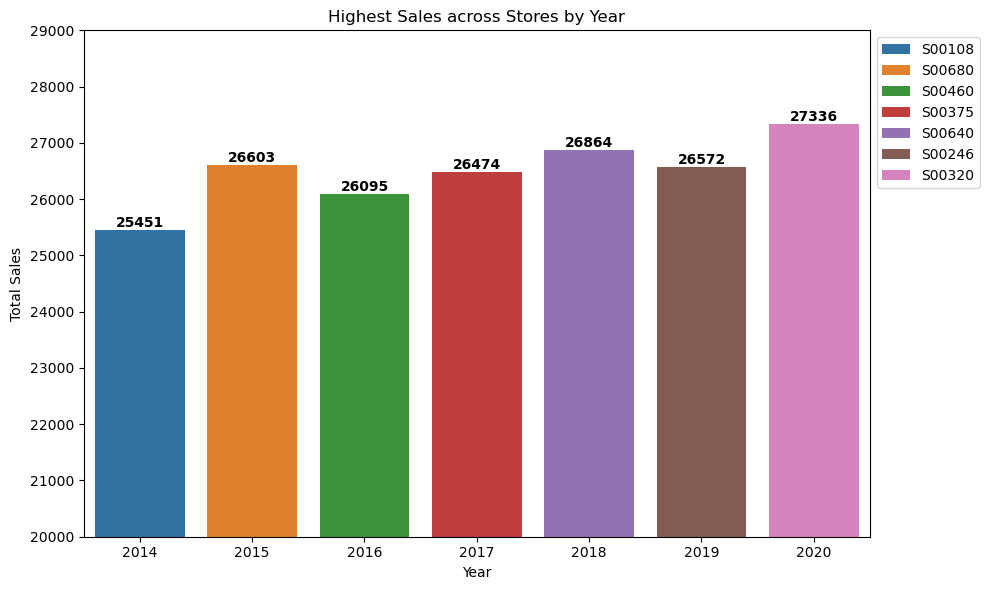

'\nThe exclusion of 2021 data is due to the fact that only data from January of that year is available.\nIn addition, the lower total sales observed in 2014 compared to other years is likely due to the data for that year \nstarting from January 20th, which is a shorter time span and could affect the overall sales figures.\n'

In [66]:
# Creating a bar plot to visualize the total sales across stores by year, excluding data from the year 2021.

plt.figure(figsize=(10,6))
ax = sns.barplot(data=best_selling_store_by_year[best_selling_store_by_year["year"] !=2021], 
            x="year", y="total_sales", hue="store_key")
add_labels(ax)
plt.title("Highest Sales across Stores by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.ylim(20000, 29000)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

"""
The exclusion of 2021 data is due to the fact that only data from January of that year is available.
In addition, the lower total sales observed in 2014 compared to other years is likely due to the data for that year 
starting from January 20th, which is a shorter time span and could affect the overall sales figures.
"""

In [67]:
df_merged_edited["item_description"].value_counts()

item_description
Beverage - Soda               109741
Food - Healthy                109585
Food - Chips                   79676
Beverage Sparkling Water       79353
Kitchen Supplies               72416
Food - Chocolate               52758
Beverage - Energy/Protein      49300
Food - Sweets                  41747
Beverage - Gatorade            37713
Beverage Water                 34173
Coffee Sweetener               30511
Gum - Mints                    30237
Beverage - Juice               26865
Coffee K-Cups                  26671
Beverage - Iced Tea            26517
Food - Nuts                    22846
Dishware - Cups Hot            22834
Coffee Cream                   22702
Dishware - Plates              22538
Food - Snacks                  18942
Coffee Ground                  18901
Dishware - Cups Cold           11369
Dishware - Utensils            11206
Coffee Hot Cocoa                7585
Coffee Creamer                  7584
Medicine                        7575
Dishware - Bowls     

In [68]:
# Identifying the best-selling items per store for each year based on total sales, ranking them and selecting only the top-selling item per store.

stores_best_selling_items_per_year = df_merged_edited.groupby(["year","store_key", "item_description"])["total_price"].sum().reset_index()
stores_best_selling_items_per_year.rename(columns = {"total_price":"total_sales"}, inplace=True)
stores_best_selling_items_per_year["sale_rank"] = stores_best_selling_items_per_year.sort_values(by=["year","total_sales"], ascending=[True,False]).groupby(
    "store_key").cumcount() + 1
stores_best_selling_items_per_year = stores_best_selling_items_per_year[stores_best_selling_items_per_year["sale_rank"] == 1].sort_values(by="store_key")
stores_best_selling_items_per_year[["year", "store_key", "item_description", "total_sales"]]

,year,store_key,item_description,total_sales
20,2014,S0001,Food - Healthy,1745.0
27,2014,S0002,Beverage - Energy/Protein,2226.0
71,2014,S0003,Food - Chocolate,1852.0
97,2014,S0004,Food - Chips,1866.0
126,2014,S0005,Food - Chocolate,2036.0
...,...,...,...,...
19624,2014,S0095,Food - Healthy,1974.0
19631,2014,S0096,Beverage - Energy/Protein,3998.0
19677,2014,S0097,Food - Healthy,2363.5
19706,2014,S0098,Food - Healthy,2546.0


In [69]:
#Calculating the most selling item category per year

most_selling_items_per_year = df_merged_edited.groupby(["year", "item_description"])["quantity"].sum().reset_index()
most_selling_items_per_year = most_selling_items_per_year.rename(columns = {"quantity":"total_quantity"})
most_selling_items_per_year["quantity_rank"] = most_selling_items_per_year.sort_values(
    by=["year", "total_quantity"], ascending=[True, False]).groupby("year").cumcount() + 1
most_selling_items_per_year = most_selling_items_per_year[most_selling_items_per_year["quantity_rank"] == 1].sort_values(by="year")
most_selling_items_per_year[["year", "item_description", "total_quantity"]]

,year,item_description,total_quantity
5,2014,Beverage - Soda,88879
53,2015,Food - Healthy,94796
65,2016,Beverage - Soda,93637
95,2017,Beverage - Soda,93508
125,2018,Beverage - Soda,93935
155,2019,Beverage - Soda,94702
185,2020,Beverage - Soda,94988
215,2021,Beverage - Soda,5698


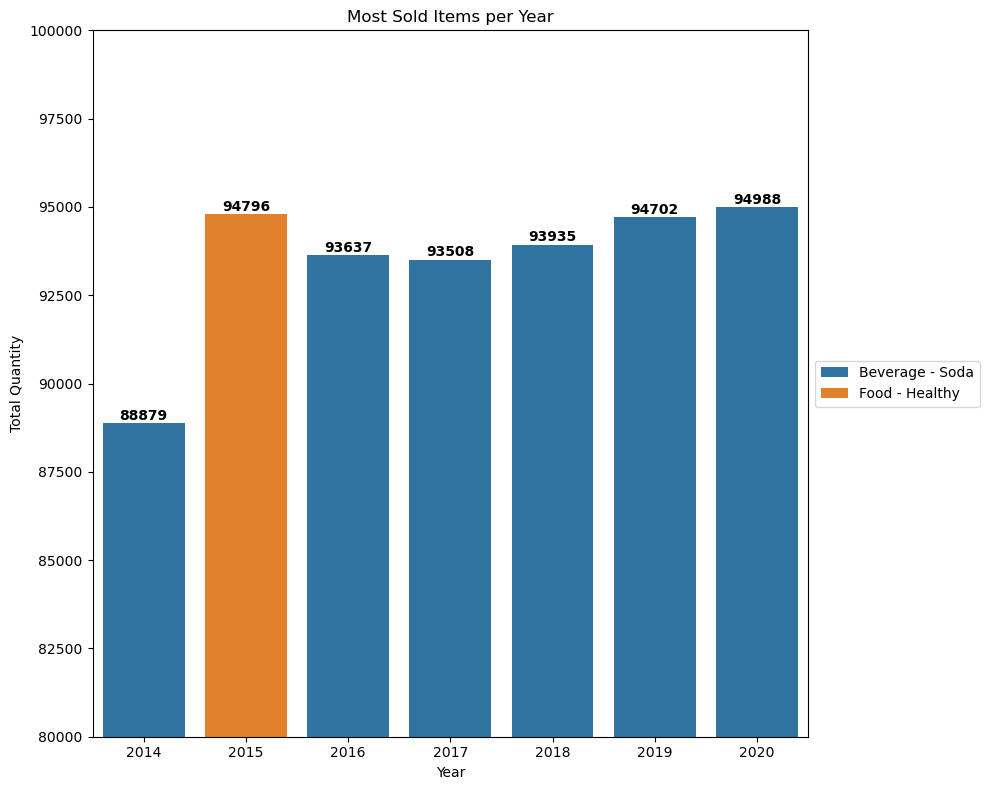

In [70]:
# Creating a bar plot to visualize the total quantity of the most sold items by year, excluding data from 2021.
plt.figure(figsize = (10,8))
ax = sns.barplot(data=most_selling_items_per_year[most_selling_items_per_year["year"] != 2021], x="year", y="total_quantity", hue="item_description")
add_labels(ax)
plt.title("Most Sold Items per Year")
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.ylim(80000, 100000)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [71]:
# Calculating the customer with the highest purchase per year
top_spender_per_year = df_merged_edited.groupby(["year", "customer_key", "customer_name"])["total_price"].sum().reset_index()
top_spender_per_year.rename(columns={"total_price":"total_sales"}, inplace=True)
top_spender_per_year["spender_rank"] = top_spender_per_year.sort_values(
    ["year", "total_sales"], ascending = [True, False]).groupby("year").cumcount() + 1
top_spender_per_year = top_spender_per_year[top_spender_per_year["spender_rank"] == 1]
top_spender_per_year[["year", "customer_key", "customer_name", "total_sales"]]

,year,customer_key,customer_name,total_sales
7214,2014,C007240,Neha Sharma,3902.50
12091,2015,C002939,Preeti,4548.50
21632,2016,C003318,Joity,4147.50
35018,2017,C007553,Harpreet Kaur @ Geetanjli,3958.25
45114,2018,C008486,Shama,4127.00
50237,2019,C004434,Manpreet @ Simaran,4058.25
56415,2020,C001438,Sonam,4571.50
65962,2021,C002998,Suman,939.00


In [72]:
#Calculating best-performing division by total sales each year.
division_total_sale_year = df_merged_edited.groupby(["year", "division"])["total_price"].sum().reset_index()
division_total_sale_year.rename(columns={"total_price":"total_sales"}, inplace=True)
division_total_sale_year["division_rank"] = division_total_sale_year.sort_values(
    ["year", "total_sales"], ascending=[True, False]).groupby("year").cumcount() + 1
division_total_sale_year = division_total_sale_year[division_total_sale_year["division_rank"] == 1]
division_total_sale_year[["year", "division", "total_sales"]] 

,year,division,total_sales
2,2014,Dhaka,5570228.75
9,2015,Dhaka,5865078.75
16,2016,Dhaka,5764939.50
23,2017,Dhaka,5783097.50
30,2018,Dhaka,5843827.00
37,2019,Dhaka,5776387.50
44,2020,Dhaka,5820040.25
51,2021,Dhaka,341020.50


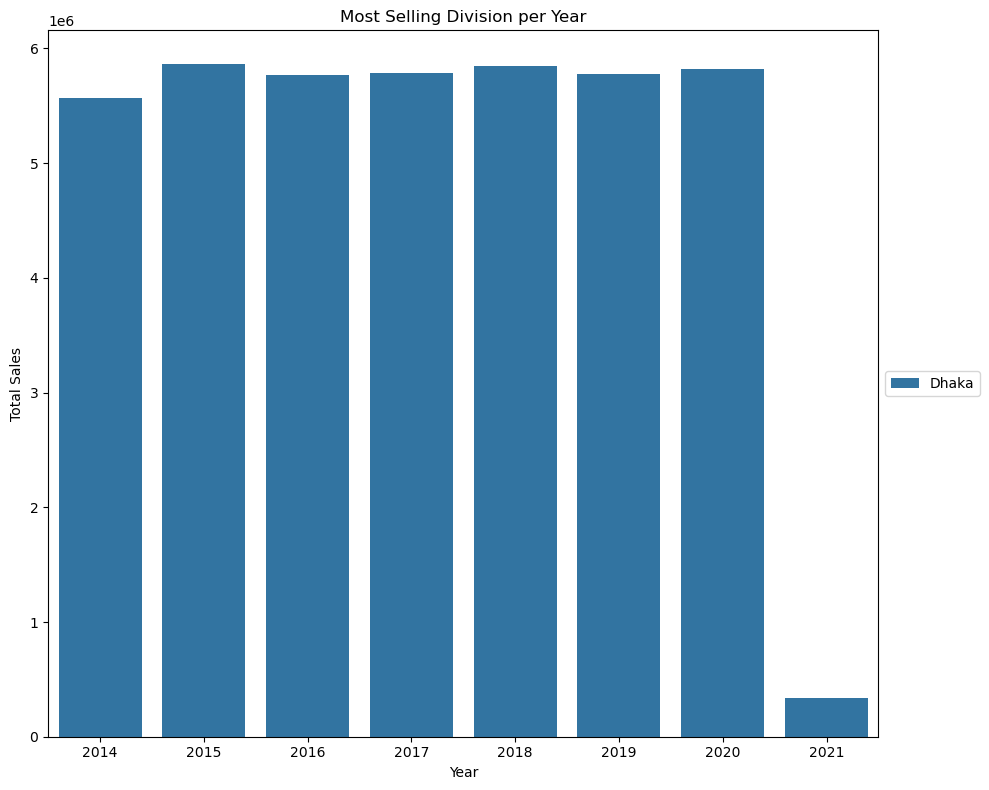

In [73]:
plt.figure(figsize = (10,8))
sns.barplot(data=division_total_sale_year, x="year", y="total_sales", hue="division")
plt.title("Most Selling Division per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [74]:
#Calculating and formatting total sales per quarter-year.
quarterly_sales = df_merged_edited.groupby(["quarter", "year"])["total_price"].sum().reset_index()
quarterly_sales.rename(columns={"total_price":"total_sales"}, inplace=True)
quarterly_sales["quarter_year"] = quarterly_sales["year"].astype(str) + "-" + quarterly_sales["quarter"]
quarterly_sales = quarterly_sales.sort_values("quarter_year")
quarterly_sales.drop(columns = ["quarter", "year"], inplace=True)
quarterly_sales = quarterly_sales[(quarterly_sales["quarter_year"] != "2021-Q1") & (quarterly_sales["quarter_year"] != "2014-Q1")]
quarterly_sales = quarterly_sales[["quarter_year", "total_sales"]]
quarterly_sales

,quarter_year,total_sales
8,2014-Q2,3754684.75
15,2014-Q3,3889951.25
22,2014-Q4,3808563.25
1,2015-Q1,3692988.50
9,2015-Q2,3756224.50
16,2015-Q3,3862388.75
23,2015-Q4,3784118.50
2,2016-Q1,3737244.50
10,2016-Q2,3724199.25
17,2016-Q3,3759319.25


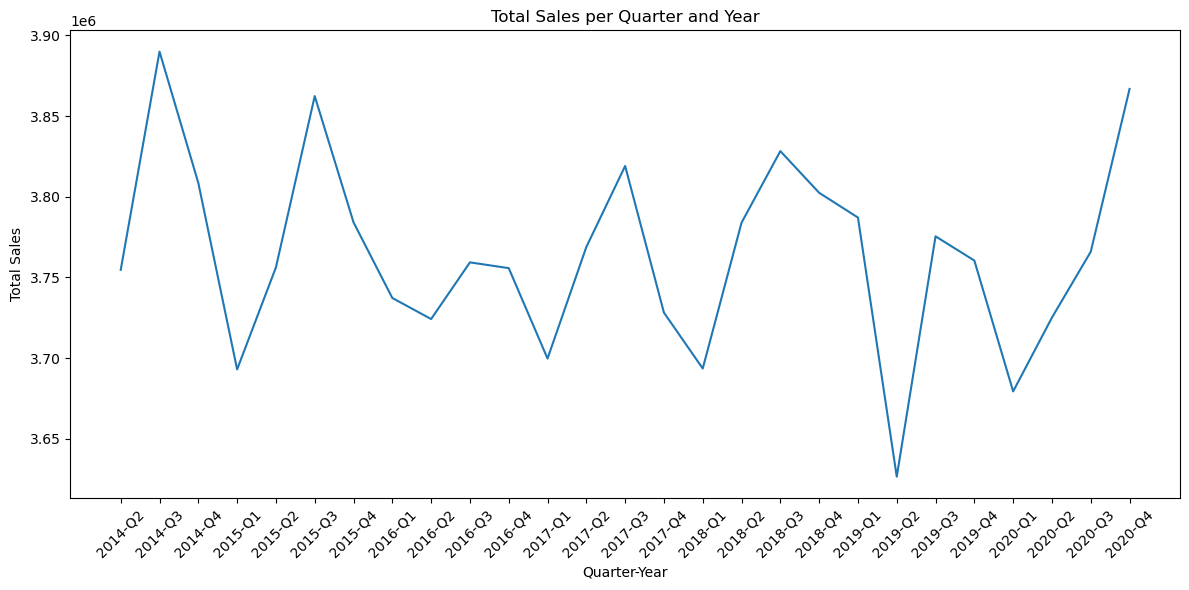

In [75]:
plt.figure(figsize = (12,6))
sns.lineplot(data=quarterly_sales, x="quarter_year", y="total_sales")
plt.title("Total Sales per Quarter and Year")
plt.xlabel("Quarter-Year")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [76]:
# Calculating and formatting total sales per division for each quarter-year.
quarterly_sales_division = df_merged_edited.groupby(["quarter", "year", "division"])["total_price"].sum().reset_index()
quarterly_sales_division.rename(columns={"total_price":"total_sales"}, inplace=True)
quarterly_sales_division["quarter_year"] = quarterly_sales_division["year"].astype(str) + "-" + quarterly_sales_division["quarter"]
quarterly_sales_division = quarterly_sales_division.sort_values("quarter_year")
quarterly_sales_division.drop(columns = ["quarter", "year"], inplace=True)
quarterly_sales_division = quarterly_sales_division[(quarterly_sales_division["quarter_year"] != "2021-Q1") 
& (quarterly_sales_division["quarter_year"] != "2014-Q1")]
quarterly_sales_division = quarterly_sales_division[["division", "quarter_year", "total_sales"]]
quarterly_sales_division

,division,quarter_year,total_sales
57,Chittagong,2014-Q2,692900.25
58,Dhaka,2014-Q2,1473149.50
59,Khulna,2014-Q2,404356.50
56,Barisal,2014-Q2,272948.25
61,Rangpur,2014-Q2,289824.00
...,...,...,...
199,Khulna,2020-Q4,409312.75
198,Dhaka,2020-Q4,1507237.00
196,Barisal,2020-Q4,280845.75
202,Sylhet,2020-Q4,200504.50


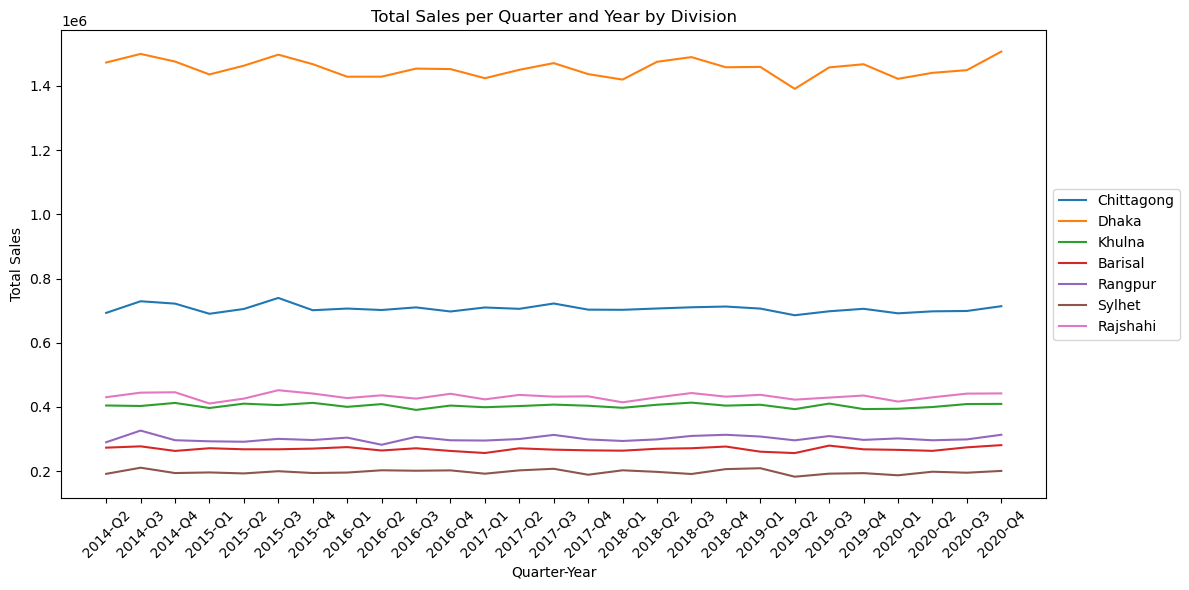

In [77]:
plt.figure(figsize = (12,6))
sns.lineplot(data=quarterly_sales_division, x="quarter_year", y="total_sales", hue="division")
plt.title("Total Sales per Quarter and Year by Division")
plt.xlabel("Quarter-Year")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

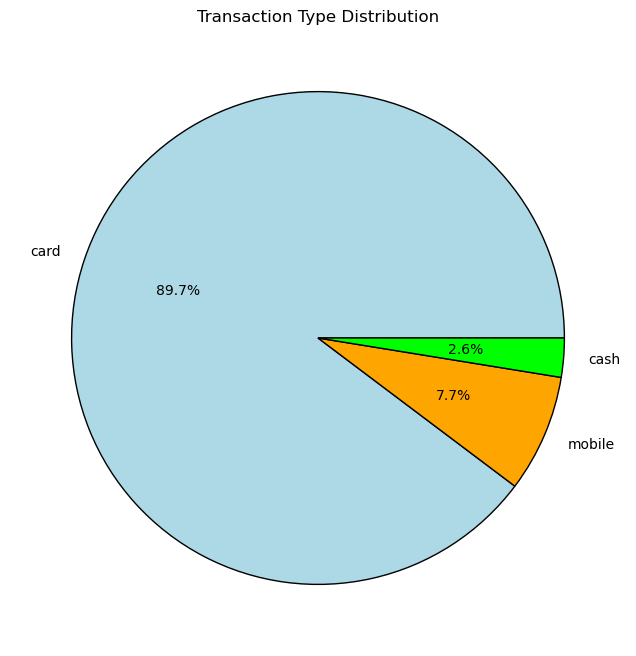

In [78]:
# Creating a pie chart to visualize the distribution of transaction types in the dataset.
trans_type_counts = df_merged_edited["trans_type"].value_counts()
plt.figure(figsize= (12,8))
plt.pie(trans_type_counts, labels=trans_type_counts.index, autopct='%1.1f%%', 
        colors=["lightblue", "orange", "lime"], wedgeprops={"edgecolor": "black"})
plt.title("Transaction Type Distribution")
plt.show()

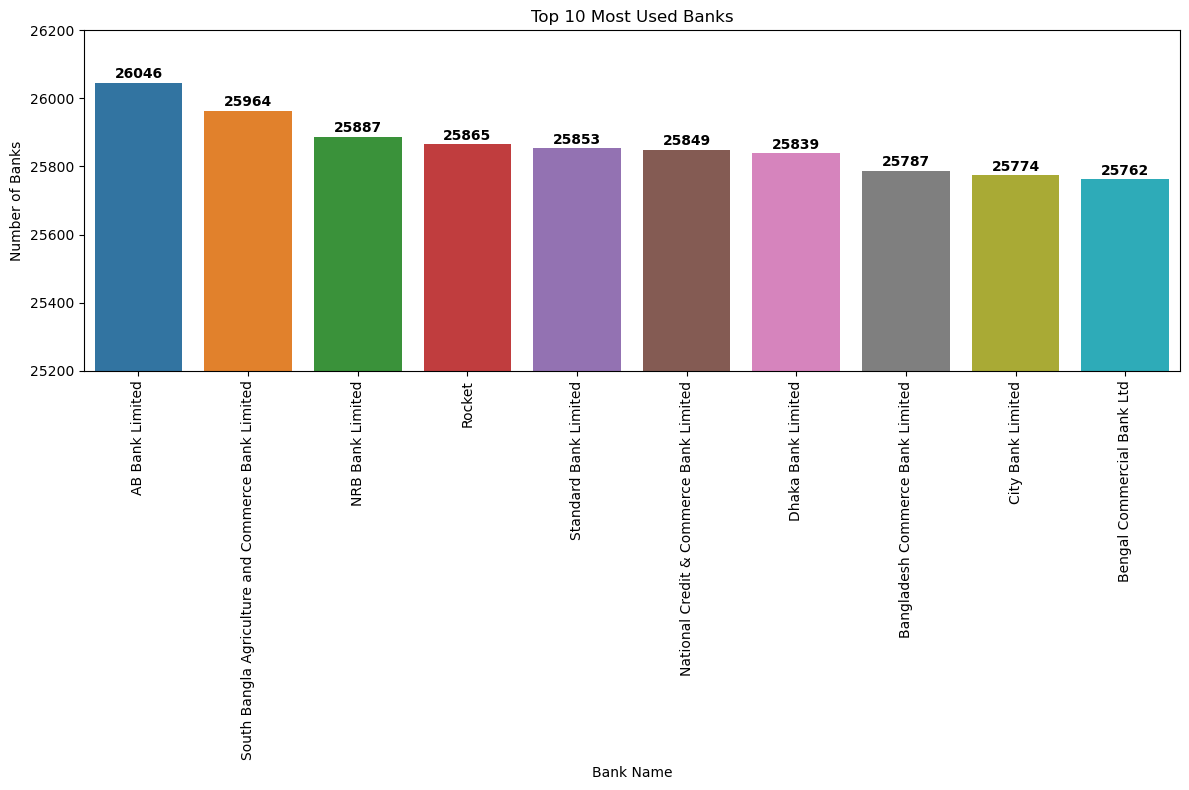

In [79]:
# Plotting the top 10 most frequently used banks with their respective counts
most_used_banks = df_merged_edited["bank_name"].value_counts().reset_index().head(10)
most_used_banks

plt.figure(figsize = (12,8))
palette = sns.color_palette("tab10")
ax = sns.barplot(data=most_used_banks, x="bank_name", y="count", palette = palette)
add_labels(ax)
plt.title("Top 10 Most Used Banks")
plt.xlabel("Bank Name")
plt.xticks(rotation=90)
plt.ylabel("Number of Banks")
plt.ylim(25200, 26200)
plt.tight_layout()
plt.show()

In [80]:
#Identifying the top 3 most used banks per division
three_most_used_bank_per_division = df_merged_edited.groupby("division")["bank_name"].value_counts().reset_index()
three_most_used_bank_per_division = three_most_used_bank_per_division.sort_values(
    ["division", "count"], ascending = [True, False]).groupby("division").head(3).reset_index()

three_most_used_bank_per_division = three_most_used_bank_per_division.sort_values("bank_name")
three_most_used_bank_per_division

,index,division,bank_name,count
6,78,Dhaka,AB Bank Limited,10112
12,156,Rajshahi,AB Bank Limited,3092
2,2,Barisal,Citizens Bank Limited,1883
15,195,Rangpur,City Bank Limited,2125
14,158,Rajshahi,City Bank Limited,3040
7,79,Dhaka,Dhaka Bank Limited,10051
19,235,Sylhet,IFIC Bank Limited,1409
1,1,Barisal,Mercantile Bank Limited,1889
10,118,Khulna,Midland Bank Limited,2831
8,80,Dhaka,Modhumoti Bank Limited,10050


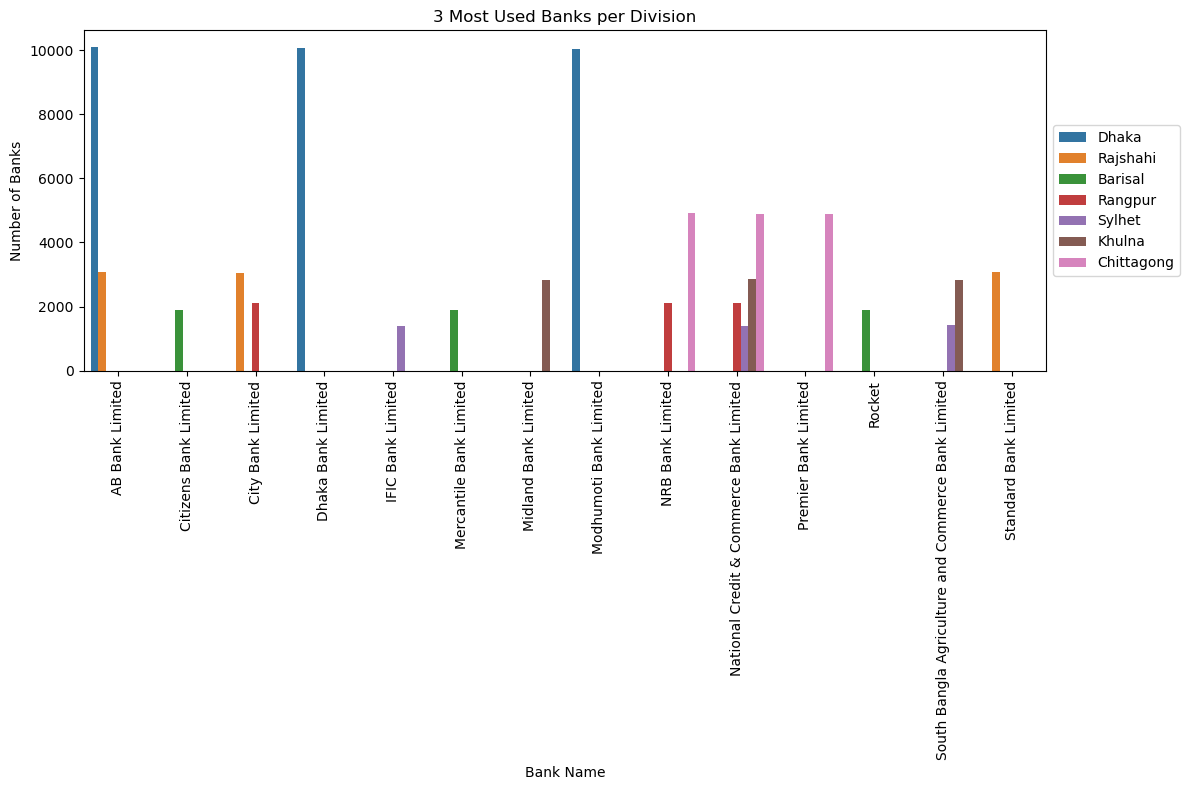

In [81]:
plt.figure(figsize = (12,8))
sns.barplot(data=three_most_used_bank_per_division, x="bank_name", y="count", hue="division")
plt.title("3 Most Used Banks per Division")
plt.xlabel("Bank Name")
plt.xticks(rotation=90)
plt.ylabel("Number of Banks")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

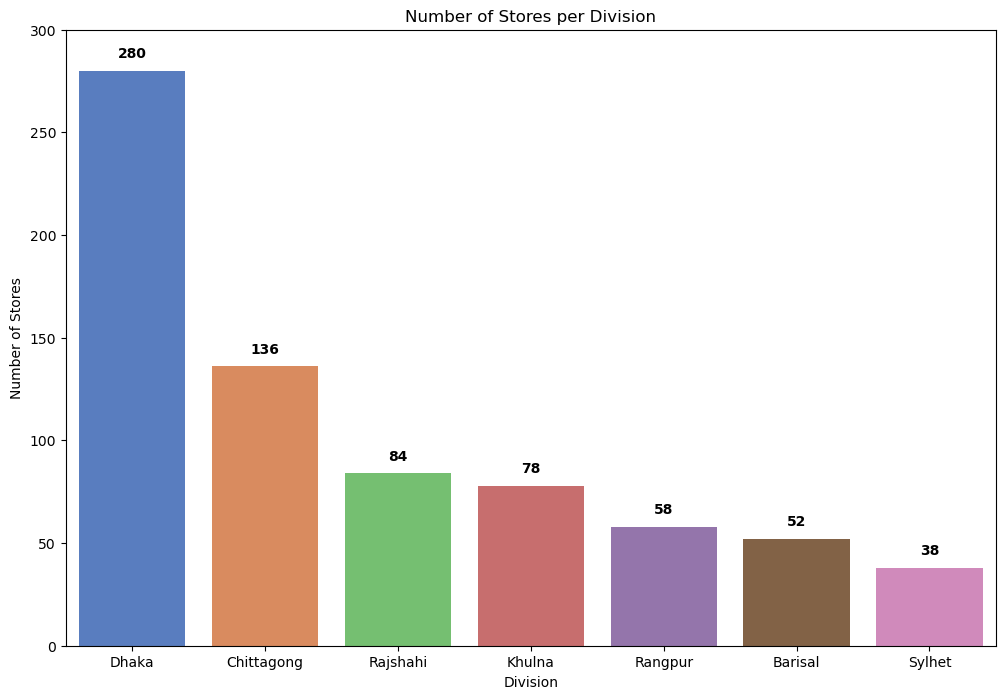

In [82]:
# Visualizing the number of stores per division, sorted in descending order
stores_per_division = df_merged_edited.groupby("division")["store_key"].nunique().reset_index()
stores_per_division.rename(columns = {"store_key":"store_count"}, inplace=True)
stores_per_division = stores_per_division.sort_values("store_count", ascending=False)
plt.figure(figsize=(12,8))
ax = sns.barplot(data=stores_per_division, x="division", y="store_count", palette = "muted")
add_labels(ax)
plt.title("Number of Stores per Division")
plt.xlabel("Division")
plt.ylabel("Number of Stores")
plt.ylim(0, 300)
plt.show()